In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("drugsComTrain_raw.xlsx")

In [3]:
data.head(10)

,Column1,drugName,condition,review,rating,date,usefulCount
0,1,Liraglutide,Obesity,""" began with the minimum 0.6 mg dose of Saxend...",10.0,"March 18, 2017",28.0
1,2,Quetiapine,Bipolar Disorde,""" Caused depression and negative, self defeati...",1.0,"August 25, 2016",2.0
2,3,Ethinyl estradiol / levonorgestrel,Birth Control,""" Ever since I started taking this birth contr...",1.0,"October 30, 2017",2.0
3,4,Lorazepam,Anxiety,""" Had a sort of nervous breakdown during a tri...",9.0,"June 4, 2014",64.0
4,5,Aczone,Acne,""" I am 28, have struggled with acne for 10 ye...",10.0,"June 2, 2015",16.0
5,6,Plan B,Emergency Contraception,""" I am not the type to, but recently single, I...",10.0,"August 21, 2017",7.0
6,7,OnabotulinumtoxinA,Overactive Bladde,""" I had my injections last Wed. I had to go to...",1.0,"June 21, 2016",51.0
7,8,Plan B,Emergency Contraception,""" I had unprotected sex and my partner did not...",10.0,"January 16, 2017",5.0
8,9,Zolpidem,Insomnia,""" I hate the doctors that prescribe ambien to...",1.0,"March 28, 2017",5.0
9,10,Bisacodyl,Constipation,""" I hate this stuff!!! Had been constipated fo...",1.0,"April 6, 2017",9.0


In [4]:
new_data = data.rename(columns = {"Column1": "Sr_No", 
                                  "drugName":"Drug_Name", 
                                  "condition": "Condition",
                                  "review" : "Review",
                                  "rating" : "Rating",
                                  "date": "Date",
                                  "usefulCount": "Useful_Count"}) 

In [5]:
new_data.head()

,Sr_No,Drug_Name,Condition,Review,Rating,Date,Useful_Count
0,1,Liraglutide,Obesity,""" began with the minimum 0.6 mg dose of Saxend...",10.0,"March 18, 2017",28.0
1,2,Quetiapine,Bipolar Disorde,""" Caused depression and negative, self defeati...",1.0,"August 25, 2016",2.0
2,3,Ethinyl estradiol / levonorgestrel,Birth Control,""" Ever since I started taking this birth contr...",1.0,"October 30, 2017",2.0
3,4,Lorazepam,Anxiety,""" Had a sort of nervous breakdown during a tri...",9.0,"June 4, 2014",64.0
4,5,Aczone,Acne,""" I am 28, have struggled with acne for 10 ye...",10.0,"June 2, 2015",16.0


In [6]:
from collections import Counter
Counter(new_data.Drug_Name)

Counter({'Liraglutide': 1018,
         'Quetiapine': 482,
         'Ethinyl estradiol / levonorgestrel': 1334,
         'Lorazepam': 316,
         'Aczone': 169,
         'Plan B': 792,
         'OnabotulinumtoxinA': 199,
         'Zolpidem': 631,
         'Bisacodyl': 670,
         'Nexplanon': 2887,
         'Concerta': 268,
         'Marinol': 21,
         'Triamcinolone': 88,
         'Amoxapine': 3,
         'Invokana': 191,
         'Mirtazapine': 557,
         'Focalin': 54,
         'Contrave': 1137,
         'Miconazole': 1242,
         'Skyla': 1075,
         'Trulicity': 288,
         'Guaifenesin / pseudoephedrine': 179,
         'Levonorgestrel': 1724,
         'Keppra': 164,
         'Lamictal': 444,
         'Ethinyl estradiol / norgestimate': 1859,
         'Ethinyl estradiol / norethindrone': 2227,
         'Atomoxetine': 291,
         'Plan B One-Step': 552,
         'Tenofovir': 10,
         'Loteprednol': 12,
         'Mirena': 439,
         'Levetiracetam': 53,
   

## Data Cleaning

In [7]:
new_data.dtypes

Sr_No             int64
Drug_Name        object
Condition        object
Review           object
Rating          float64
Date             object
Useful_Count    float64
dtype: object

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128749 entries, 0 to 128748
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sr_No         128749 non-null  int64  
 1   Drug_Name     128749 non-null  object 
 2   Condition     128140 non-null  object 
 3   Review        128749 non-null  object 
 4   Rating        114061 non-null  float64
 5   Date          114061 non-null  object 
 6   Useful_Count  114061 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


## Duplicates

In [9]:
#Count of duplicated rows
new_data.Review[new_data.Review.duplicated()].shape

(373,)

### Remove entire row based on duplicate values in review column

In [10]:
data_cleaned = new_data.drop_duplicates(subset='Review', keep="first")

In [11]:
data_cleaned

,Sr_No,Drug_Name,Condition,Review,Rating,Date,Useful_Count
0,1,Liraglutide,Obesity,""" began with the minimum 0.6 mg dose of Saxend...",10.0,"March 18, 2017",28.0
1,2,Quetiapine,Bipolar Disorde,""" Caused depression and negative, self defeati...",1.0,"August 25, 2016",2.0
2,3,Ethinyl estradiol / levonorgestrel,Birth Control,""" Ever since I started taking this birth contr...",1.0,"October 30, 2017",2.0
3,4,Lorazepam,Anxiety,""" Had a sort of nervous breakdown during a tri...",9.0,"June 4, 2014",64.0
4,5,Aczone,Acne,""" I am 28, have struggled with acne for 10 ye...",10.0,"June 2, 2015",16.0
...,...,...,...,...,...,...,...
128744,128745,Zyrtec,Allergic Rhinitis,"""Zyrtec worked well for my nasal allergies, bu...",2.0,"March 15, 2012",30.0
128745,128746,Zyrtec,Allergic Rhinitis,"""Zyrtec worked well to control my seasonal all...",3.0,"February 10, 2009",83.0
128746,128747,Zyrtec,Allergic Rhinitis,"""Zyrtec works incredibly well for my severe ra...",5.0,"August 25, 2013",61.0
128747,128748,Zyrtec,Allergic Rhinitis,"""Zyrtec works well in combating allergies as w...",10.0,"March 6, 2014",34.0


In [12]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128376 entries, 0 to 128748
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sr_No         128376 non-null  int64  
 1   Drug_Name     128376 non-null  object 
 2   Condition     127768 non-null  object 
 3   Review        128376 non-null  object 
 4   Rating        113689 non-null  float64
 5   Date          113689 non-null  object 
 6   Useful_Count  113689 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 7.8+ MB


### Remove entire row based on null values in rating column

In [13]:
data_cleaned2 = data_cleaned.dropna(axis=0, subset=['Rating'])

In [14]:
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113689 entries, 0 to 128748
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sr_No         113689 non-null  int64  
 1   Drug_Name     113689 non-null  object 
 2   Condition     113130 non-null  object 
 3   Review        113689 non-null  object 
 4   Rating        113689 non-null  float64
 5   Date          113689 non-null  object 
 6   Useful_Count  113689 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


### Remove entire row based on null values in condition column

In [15]:
data_cleaned3 = data_cleaned2.dropna(axis=0, subset=['Condition'])

In [16]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113130 entries, 0 to 128748
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sr_No         113130 non-null  int64  
 1   Drug_Name     113130 non-null  object 
 2   Condition     113130 non-null  object 
 3   Review        113130 non-null  object 
 4   Rating        113130 non-null  float64
 5   Date          113130 non-null  object 
 6   Useful_Count  113130 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.9+ MB


### Missing Values and Imputation

In [17]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)]

,Sr_No,Drug_Name,Condition,Review,Rating,Date,Useful_Count


<AxesSubplot:>

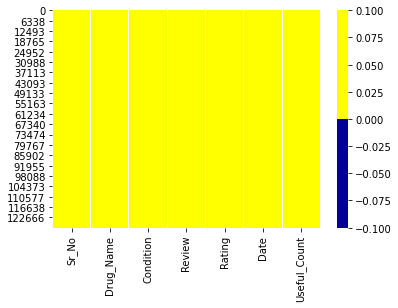

In [18]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

### Eliminating rows with Useful Count above 90 percentile

In [19]:
data_cleaned3.Useful_Count.describe()

count    113130.000000
mean         27.372262
std          35.512454
min           0.000000
25%           6.000000
50%          16.000000
75%          35.000000
max        1291.000000
Name: Useful_Count, dtype: float64

In [20]:
data_cleaned4 = data_cleaned3[data_cleaned3.Useful_Count < np.percentile(data_cleaned3.Useful_Count,90)]

In [21]:
data_cleaned4.Useful_Count.describe()

count    101542.000000
mean         18.222145
std          16.223609
min           0.000000
25%           5.000000
50%          13.000000
75%          27.000000
max          65.000000
Name: Useful_Count, dtype: float64

### Generating Report

In [22]:
import pandas_profiling as pp
import sweetviz as sv

In [23]:
EDA_report= pp.ProfileReport(data_cleaned4)
EDA_report.to_file(output_file='drug report.html')

In [24]:
sweet_report = sv.analyze(data_cleaned4)
sweet_report.show_html('drug_report.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report drug_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Converting dataset to csv file

In [25]:
data_cleaned4.to_csv('final_data.csv', index=False, encoding='utf-8')